# Regression model to predict cm value based on dependent pixel distance value 

## Create Dataset for regression model

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import os
import csv

In [23]:
file = open("./keypoints.csv", 'r')
reader = csv.DictReader(file)
X_values = []
Y_values = []
for row in reader:
    X_values.append(float(row['Keypoint Pixel Distance']))
    Y_values.append(float(row['CM Distance']))

#print(X_values)
#print(Y_values)

Coefficients: 
 [[0.14140187]]
intercept: 
 [11.49840089]
Mean squared error: 3.40
R2: -0.26


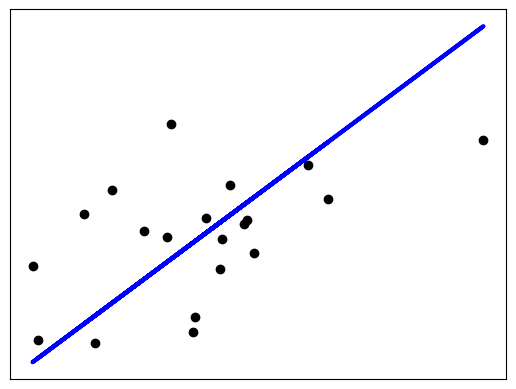

In [24]:
# Split tto train & test dataset
X_train = np.array([X_values[:-20]]).reshape(-1, 1)
X_test = np.array([X_values[-20:]]).reshape(-1, 1)

Y_train = np.array([Y_values[:-20]]).reshape(-1, 1)
Y_test = np.array([Y_values[-20:]]).reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

Y_pred = regr.predict(X_test)

print("Coefficients: \n", regr.coef_)
print("intercept: \n", regr.intercept_)

print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
print("R2: %.2f" % r2_score(Y_test, Y_pred))

plt.scatter(X_test, Y_test, color="black")
plt.plot(X_test, Y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
PIXEL_DISTANCE_SHOULDER = 179.31 ## Should be ~39cm
print("Shoulder in cm: ",regr.intercept_[0]+(regr.coef_[0][0]*PIXEL_DISTANCE_SHOULDER))

Calculated height:  36.85316977242675
